In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


This is one of the handwriting digits of 4:



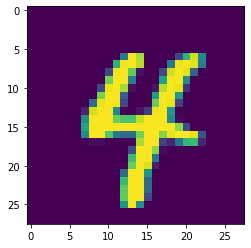

In [2]:
# Load MNIST dataset 
(x_train , y_train), (x_test , y_test) = keras.datasets.mnist.load_data()

# Standardize the data to have a spread of 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Pick a random integer/digit within the training set
random_digit = np.random.randint(0, len(x_train)-1)

# Plot the image of this digit for visualization and comparison after training
print("\nThis is one of the handwriting digits of \033[1m"+str(y_train[random_digit])+":\n")
plt.imshow(x_train[random_digit])
plt.show()

## Fully-Connected ANN

In [3]:
# Define the network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 12)                9420      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
Total params: 9,550
Trainable params: 9,550
Non-trainable params: 0
_________________________________________________________________


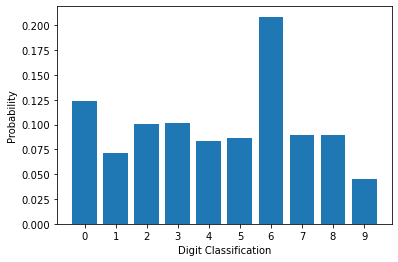

In [4]:
# Calculate the model prediction "before" training
pred = model(np.array(x_train[random_digit:random_digit+1], dtype=np.float32))

# Plot the predicted probability distribution
label = np.arange(0, len(pred[0]))
plt.bar(label, pred[0]) 
plt.xticks(label) 
plt.xlabel('Digit Classification')
plt.ylabel('Probability')
plt.show()

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model and record the history
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4669 - accuracy: 0.8685 - val_loss: 0.2659 - val_accuracy: 0.9225
Epoch 2/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2599 - accuracy: 0.9254 - val_loss: 0.2357 - val_accuracy: 0.9310
Epoch 3/30
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2340 - accuracy: 0.9328 - val_loss: 0.2249 - val_accuracy: 0.9344
Epoch 4/30
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2195 - accuracy: 0.9363 - val_loss: 0.2197 - val_accuracy: 0.9367
Epoch 5/30
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2093 - accuracy: 0.9401 - val_loss: 0.2158 - val_accuracy: 0.9379
Epoch 6/30
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2012 - accuracy: 0.9426 - val_loss: 0.2146 - val_accuracy: 0.9373
Epoch 7/30
60000/60000 [==============================] 

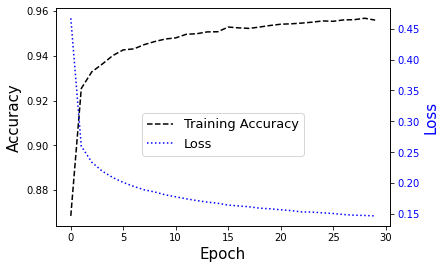

In [6]:
# Plot the accuracy based on the training/optimization history
fig, ax1 = plt.subplots()
ax1.set_xlabel('Epoch', fontsize=15)
ax1.set_ylabel('Accuracy', color='k', fontsize=15)
ax1.plot(history.history['accuracy'], 'k--', label='Training Accuracy')
ax1.tick_params(axis='y', labelcolor='k')

# also plot the loss
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Loss', color='b', fontsize=15) 
ax2.plot(history.history['loss'], 'b:',label='Loss')
ax2.tick_params(axis='y', labelcolor='b')

fig.legend(loc='center', fontsize=13)
plt.show()

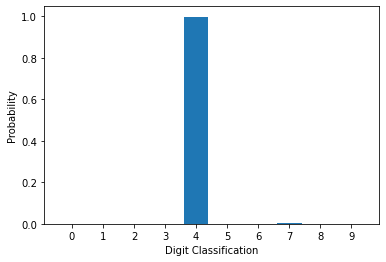

In [7]:
# Calculate the model prediction "before" training
pred = model(np.array(x_train[random_digit:random_digit+1], dtype=np.float32))

# Plot the predicted probability distribution
plt.bar(label, pred[0]) 
plt.xticks(label) 
plt.xlabel('Digit Classification')
plt.ylabel('Probability')
plt.show()

## Compare Optimizers for Training

In [8]:
def build_compile(optimizer):
    
    # Use the same network topology as last week
    model = keras.Sequential([ keras.layers.Flatten(input_shape=(28, 28)), 
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])

    # compile the model with a cross-entropy loss and specify the given optimizer
    model.compile(optimizer=optimizer, loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
    return model

In [9]:
# Generate an array of the different optimizers to iterate over in a for loop
optimizer_names = ['SGD','Momentum','Nesterov', 'RMSprop','Adagrad','Adam','NAdam']
optimizer_list = ['SGD',keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=False),keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=True), 'RMSprop','Adagrad','Adam','NAdam']

# Arrays for training and validation performance
hist_acc = []
hist_val_acc = []
hist_loss = []
hist_val_loss = []

# Iterate over optimizers and train the network, using x_test and y_test as a validation set in each epoch
for name,item in zip(optimizer_names, optimizer_list):
    print("-------------------------------------")
    print("Training the ANN with %s optimizer" %str(name))
    print("-------------------------------------")
    
    # Get the model from our function above
    model = build_compile(item)
    
    # Train the model
    seqModel = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))
    
    # Store the performance
    hist_acc.append(seqModel.history['accuracy'])
    hist_val_acc.append(seqModel.history['val_accuracy'])
    hist_loss.append(seqModel.history['loss'])
    hist_val_loss.append(seqModel.history['val_loss'])    
    print("---------------------------------------------")

-------------------------------------
Training the ANN with SGD optimizer
-------------------------------------
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 105us/sample - loss: 0.6395 - accuracy: 0.8395 - val_loss: 0.3507 - val_accuracy: 0.9062
Epoch 2/30
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3343 - accuracy: 0.9061 - val_loss: 0.2916 - val_accuracy: 0.9199
Epoch 3/30
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2871 - accuracy: 0.9189 - val_loss: 0.2615 - val_accuracy: 0.9249
Epoch 4/30
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2577 - accuracy: 0.9272 - val_loss: 0.2359 - val_accuracy: 0.9321
Epoch 5/30
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2351 - accuracy: 0.9341 - val_loss: 0.2183 - val_accuracy: 0.9374
Epoch 6/30
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2160 - a

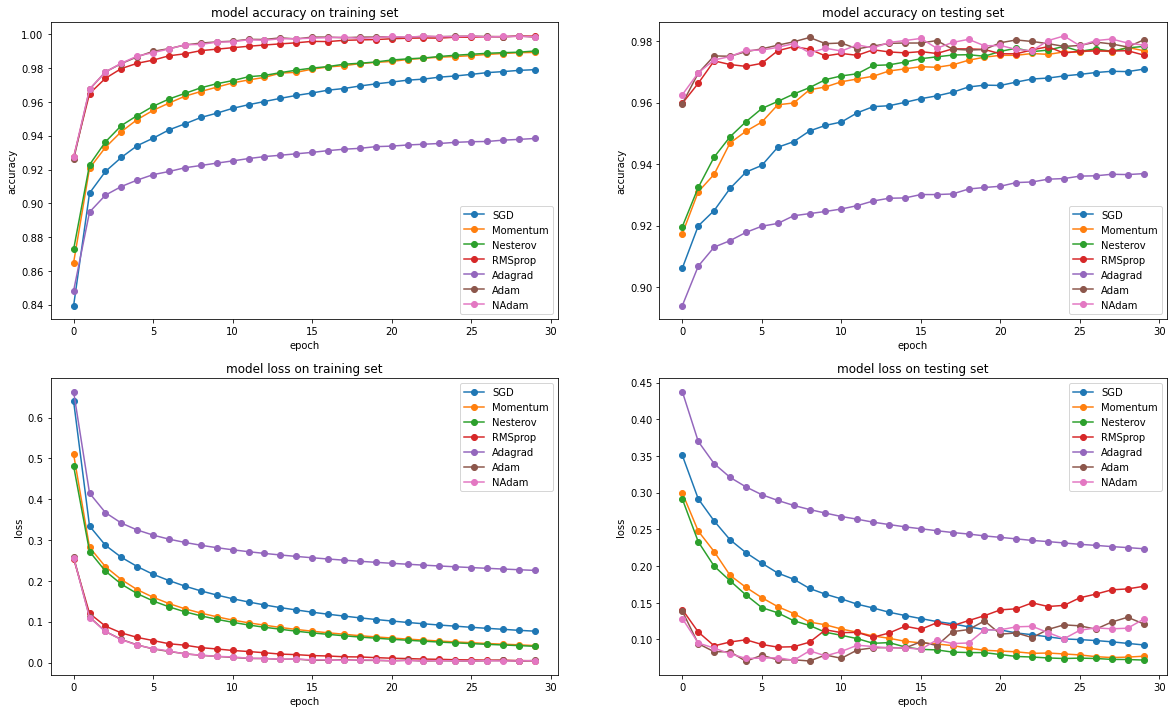

In [10]:
plt.figure(figsize=(20,12))

# summarize history for accuracy on training set
plt.subplot(221)
for i in range(len(optimizer_list)):
    plt.plot(hist_acc[i],'-o',label=str(optimizer_names[i]))
plt.title('model accuracy on training set')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')

# summarize history for accuracy on test set
plt.subplot(222)
for i in range(len(optimizer_list)):
    plt.plot(hist_val_acc[i],'-o', label=str(optimizer_names[i]))
plt.title('model accuracy on testing set')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')

# summarize history for loss on training set
plt.subplot(223)
for i in range(len(optimizer_list)):
    plt.plot(hist_loss[i],'-o',label=str(optimizer_names[i]))
plt.title('model loss on training set')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')

# summarize history for loss on test set
plt.subplot(224)
for i in range(len(optimizer_list)):
    plt.plot(hist_val_loss[i],'-o', label=str(optimizer_names[i]))
plt.title('model loss on testing set')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')

plt.show()

## Ridge (L2) Regularization

In [11]:
# Build the model with an L2 regularization added to all weights

model_l2 = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)), 
                      keras.layers.Dense(128, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
                      keras.layers.Dense(10, activation='softmax',kernel_regularizer=keras.regularizers.l2(0.001))])

# Compile the model and optimize with adam
model_l2.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

# Fit the model to the data while providing a validation set for each epoch
history_l2 = model_l2.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 111us/sample - loss: 0.4218 - accuracy: 0.9195 - val_loss: 0.3046 - val_accuracy: 0.9482
Epoch 2/50
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2907 - accuracy: 0.9540 - val_loss: 0.2695 - val_accuracy: 0.9593
Epoch 3/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2727 - accuracy: 0.9595 - val_loss: 0.2607 - val_accuracy: 0.9638
Epoch 4/50
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2663 - accuracy: 0.9625 - val_loss: 0.2506 - val_accuracy: 0.9667
Epoch 5/50
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2609 - accuracy: 0.9645 - val_loss: 0.2528 - val_accuracy: 0.9651
Epoch 6/50
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2588 - accuracy: 0.9649 - val_loss: 0.2509 - val_accuracy: 0.9667
Epoch 7/50
60000/60000 [==========================

## Early Stopping

In [12]:

# Build the model with early stopping
model_es = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)), 
                      keras.layers.Dense(128, activation='relu'),
                      keras.layers.Dense(10, activation='softmax')])

# Compile the model and optimize with adam
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model_es.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

# Fit the model to the data while providing a validation set for each epoch
history_es = model_es.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2612 - accuracy: 0.9253 - val_loss: 0.1416 - val_accuracy: 0.9581
Epoch 2/50
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1164 - accuracy: 0.9657 - val_loss: 0.0971 - val_accuracy: 0.9697
Epoch 3/50
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0790 - accuracy: 0.9754 - val_loss: 0.0919 - val_accuracy: 0.9706
Epoch 4/50
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0594 - accuracy: 0.9824 - val_loss: 0.0841 - val_accuracy: 0.9728
Epoch 5/50
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0449 - accuracy: 0.9862 - val_loss: 0.0772 - val_accuracy: 0.9762
Epoch 6/50
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0354 - accuracy: 0.9893 - val_loss: 0.0743 - val_accuracy: 0.9767
Epoch 7/50
60000/60000 [==============================] 

## Dropout

In [13]:
# Dropout

# Build the model with dropout
model_dropout = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)), 
                      keras.layers.Dense(128, activation='relu'),
                      keras.layers.Dropout(.2),
                      keras.layers.Dense(10, activation='softmax'),
                      keras.layers.Dropout(.2)])

# Compile the model and optimize with adam
model_dropout.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

# Fit the model to the data while providing a validation set for each epoch
history_dropout = model_dropout.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 97us/sample - loss: 1.8142 - accuracy: 0.7167 - val_loss: 0.4443 - val_accuracy: 0.9318
Epoch 2/50
60000/60000 [==============================] - 5s 90us/sample - loss: 1.2077 - accuracy: 0.7548 - val_loss: 0.3661 - val_accuracy: 0.9482
Epoch 3/50
60000/60000 [==============================] - 6s 93us/sample - loss: 1.0654 - accuracy: 0.7626 - val_loss: 0.3338 - val_accuracy: 0.9541
Epoch 4/50
60000/60000 [==============================] - 6s 92us/sample - loss: 0.9668 - accuracy: 0.7703 - val_loss: 0.2844 - val_accuracy: 0.9630
Epoch 5/50
60000/60000 [==============================] - 5s 91us/sample - loss: 0.8949 - accuracy: 0.7738 - val_loss: 0.2638 - val_accuracy: 0.9654
Epoch 6/50
60000/60000 [==============================] - 6s 94us/sample - loss: 0.8709 - accuracy: 0.7730 - val_loss: 0.2606 - val_accuracy: 0.9668
Epoch 7/50
60000/60000 [==============================] 

## Accuracy Curve for Comparing Ridge Regression, Early Stopping, and Dropout

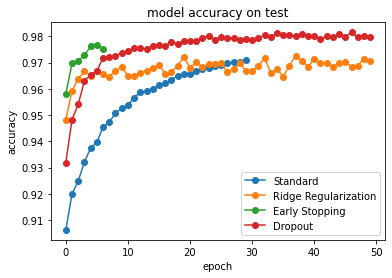

In [14]:
# plotting the accuracy curve for the cases of ridge regression, early stopping and dropout
plt.plot(hist_val_acc[0],'-o', label='Standard')
plt.plot(history_l2.history['val_accuracy'],'-o', label="Ridge Regularization")
plt.plot(history_es.history['val_accuracy'],'-o', label="Early Stopping")
plt.plot(history_dropout.history['val_accuracy'],'-o', label="Dropout")
plt.title('model accuracy on test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()